In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Load dataset

In [2]:
d0 = pd.read_csv('../input/digit-recognizer/train.csv')

#print(d0.head(d0)) # print first five rows of d0

# save the labels into a variable l

l = d0['label']

# Drop the label feature and store the pixel data in d.

d = d0.drop('label',axis =1)

d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


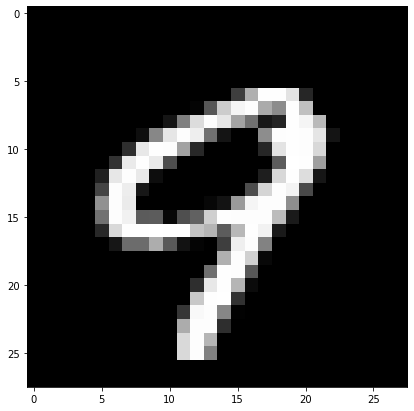

9


In [4]:
# display or plot a number

plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].to_numpy().reshape(28,28) # reshape from 1D to 2D
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()

print(l[idx])

# 2D Visualization using PCA 

## Principal Component Analysis :

PCA can be used for Dimentionality reduction as well as 2D Visualization.

**PCA for 2D visualization** 

- MNIST has 784 dimentions PCA will convert that into 2 dimentions for visualization.

**How ??** : Geometric interpretation

- Aim is to preserve maximum information after reducing the dimention.
- i.e preserving the direction with maximal spread / variance because more spread ==> more information.

**Eigen vector** : Tells us the direction where the varience is maximal  

**Eigen value** : Tells us how the data is spread? Is it only on one axis or also on other axis

lambda(i) / sumation of lambda(i) = percentage (%) of varience explaned


**PCA** : Maximizing variance if projected points.

In [5]:
# Pick first 15K data-points to work on for time-effeciency.
# Excercise : perform the same analysis on all the 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ",data.shape)

the shape of sample data =  (15000, 784)


In [6]:
# Data-preprocessing : Standardizing the data

from sklearn.preprocessing import StandardScaler
Standardized_data = StandardScaler().fit_transform(data)
print(Standardized_data.shape)

(15000, 784)


In [7]:
# find the co-varience matrix which is : A.T * A (for computing eigen values and eigen vectors)

sample_data = Standardized_data

# matrix multoplication using numpy
covar_matrix = np.matmul(sample_data.T,sample_data)

print("The shape of co-varience matrix = ", covar_matrix.shape)

The shape of co-varience matrix =  (784, 784)


In [8]:
# finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh

# the parameter eigvals is defined (low value to high value)
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782,783) eigenvalues

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("shape of eigen vectors = ",vectors.shape)
#converting the eigen vectors into (2d) shape for easyness of further computations

vectors = vectors.T

print("Updated shape of eigen vectors= ", vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st princepal
# here the vectors[0] represent the eigen vector corresponding 2nd princepal

shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors=  (2, 784)


In [9]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt

new_coordinates = np.matmul(vectors, sample_data.T)

print("resultant new data points' shape ", vectors.shape, "X", sample_data.T.shape, "=",new_coordinates.shape)



resultant new data points' shape  (2, 784) X (784, 15000) = (2, 15000)


In [10]:
#appending label to 2d projected data
# np.vstack : Stack arrays in sequence vertically 

new_coordinates = np.vstack((new_coordinates,labels)).T 

#creating a new data frame for plotting the labeled points.

dataframe = pd.DataFrame(data = new_coordinates, columns=('1st_principal','2nd_principal', 'label'))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


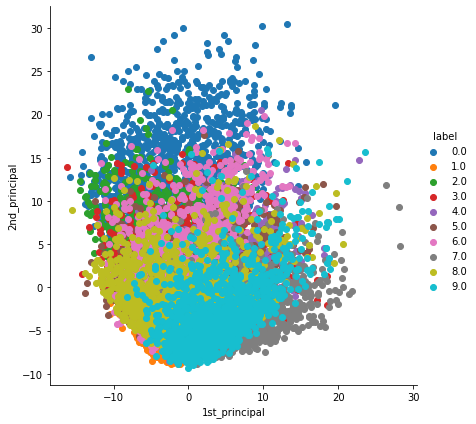

In [11]:
# ploring the 2d data points with seaborn

import seaborn as sns
sns.FacetGrid(dataframe, hue='label',size=6).map(plt.scatter,'1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [12]:
# initializing pca
from sklearn import decomposition
pca = decomposition.PCA()

In [13]:
#configure the parameters
# the number of components = 2

pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca_reduces will contain the 2-d projects of simple data
print("shape of pca_reduces.shape = ", pca_data.shape)

shape of pca_reduces.shape =  (15000, 2)


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


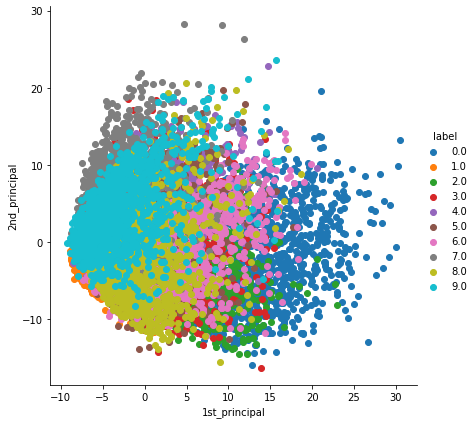

In [14]:
# attacning the label for each 2-d data point

pca_data = np.vstack((pca_data.T,labels)).T

#creating a new data fram which help us in plotting the result data
pca_df = pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal', 'label'))
sns.FacetGrid(pca_df, hue='label',size=6).map(plt.scatter,'1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA for dimensionality reduction (not for visualization) 

**What is the right numner?**
- 2-3 : for visualization
- Depends on how much original varience is explained by choosen dimention.

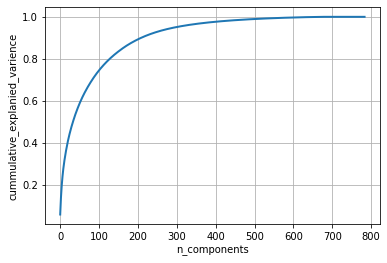

In [15]:
# PCA for dimensionality reduction (not for visualization) 

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

# with pca.explained_vcariance we will get eigen values i.e lambda i's
# percentage_var_explanined will compute for each lambda value individually
# cum_var_explained will give cummulative sum which is required answer from the formula

# formula : lamda i divided by summation of lambda i where i tends to 0 to d (d- dimention)

percentage_var_explanined = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explanined)

# plot the PCA spectrum

plt.figure(1,figsize = (6,4))

plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cummulative_explanied_varience')
plt.show()



 If we take 200 - dimentions, approx. 90% of variance is explained

# t - SNE using Scikit-Learn

### t-sne : (T- distributed Stocastic Neighborhod Embeddings)
- SOTA dimentionality reduction technique for visualization
- PCA : basic ; old

**Other Techniques** 
- MDS
- Sammon mapping 
- Graph based techniques

### PCA vs T-sne

**PCA** : Preserves global shape / structure of data

**T-sne** : Focuses on local structure (Tries to preserve distance in a neighbourhood)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


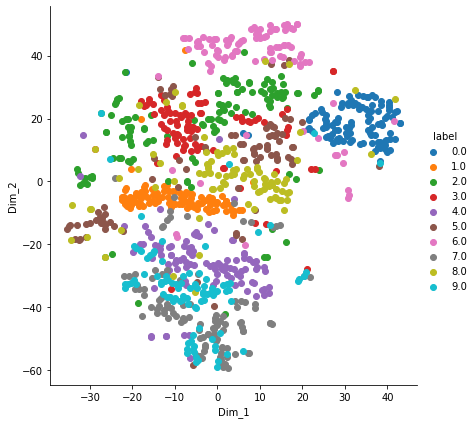

In [16]:
from sklearn.manifold import TSNE

#picking the top 1000 points as TSNE takes a lot of time for 15k points

data_1000 = Standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state= 0)

# configuring the parameters
# the number of components = 2
# default perplexity = 2
# default learning rate = 200
# default maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)

# creating a new data frame which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsen_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

#plotting the result of tsne
sns.FacetGrid(tsen_df,hue="label", size=6).map(plt.scatter,"Dim_1", "Dim_2").add_legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


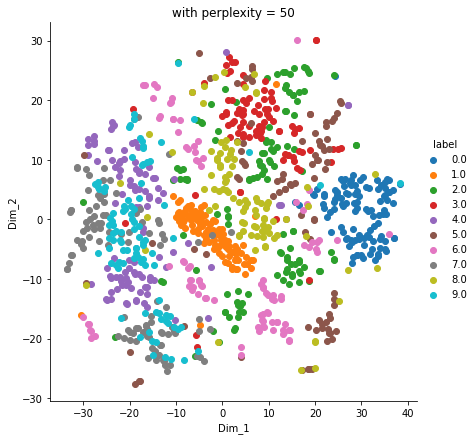

In [17]:
# Changing value of perplexity

model = TSNE(n_components=2, random_state= 0, perplexity = 50)
tsne_data = model.fit_transform(data_1000)

# creating a new data frame which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsen_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

#plotting the result of tsne
sns.FacetGrid(tsen_df,hue="label", size=6).map(plt.scatter,"Dim_1", "Dim_2").add_legend()
plt.title('with perplexity = 50')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


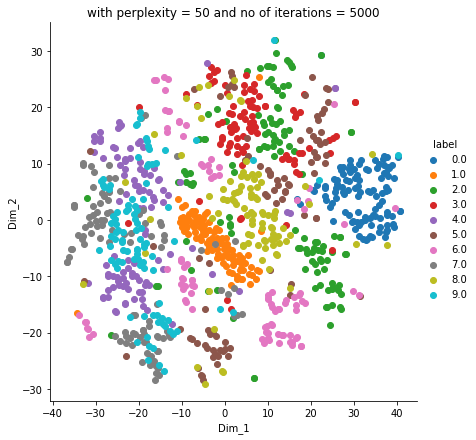

In [18]:
# Changing number of iterations

model = TSNE(n_components=2, random_state= 0, perplexity = 50, n_iter = 5000)
tsne_data = model.fit_transform(data_1000)

# creating a new data frame which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsen_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

#plotting the result of tsne
sns.FacetGrid(tsen_df,hue="label", size=6).map(plt.scatter,"Dim_1", "Dim_2").add_legend()
plt.title('with perplexity = 50 and no of iterations = 5000')
plt.show()